In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('test_tutor_data.csv').drop(columns='Unnamed: 0')

In [3]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
print(df.shape)
df.head()

(4364, 19)


,descriptions,hours_tutor,rate,bio,num_ratings,subjects_emph,subjects_all,edu,hours_sun,hours_mon,hours_tues,hours_wed,hours_thurs,hours_fri,hours_sat,hours_per_week_schedule,start_date,diff_weeks,hours_per_week_tutor
0,Experienced High School and Middle School Math...,352.0,60.0,Hello I'm Nathan! I graduated cum laude with a...,85.0,"['MATLAB', 'Biology', 'Linear Algebra', 'Algeb...",[],"['University of Maryland, College Park Aerospa...",12.0,12.0,12.0,12.0,12.0,12.0,12.0,84.0,9/12/2018,89.0,3.955056
1,"MIT Graduate; Mechanical Engineer; Physics, Ma...",173.0,120.0,- About Me -I graduated from MIT in 2011 with ...,45.0,['Physics'],"['ACT Science', 'PSAT', 'Algebra 1', 'Geometry...",['MIT Mechanical Engineer'],12.0,5.0,5.0,5.0,5.0,5.0,12.0,49.0,10/8/2013,347.0,0.498559
2,HS/College Math and Science Tutor,249.0,40.0,I have 8+ years of experience tutoring high sc...,113.0,"['Biochemistry', 'Statistics', 'SAS', 'Probabi...","['ACT Science', 'Biology', 'GED', 'Algebra 1',...","['Lewis University Biology, Chemistry', 'Emory...",2.0,3.0,6.0,6.0,6.0,12.0,5.0,40.0,NaN,NaN,NaN
3,Need help with anything Math or Science? I'm y...,1008.0,75.0,"I was born and raised in Los Angeles, CA and g...",274.0,"['Linear Algebra', 'Poker', 'SAT Math', 'Tenni...","['ACT Science', 'Algebra 1', 'Geometry', 'Chem...","['University of Hawaii at Manoa Meteorology', ...",9.0,2.0,2.0,2.0,2.0,2.0,8.0,27.0,3/10/2016,220.0,4.581818
4,Patient Engineering Graduate Knowledgeable in ...,7.0,35.0,I'm Robert! I graduated from the University of...,3.0,['Mechanical Engineering'],"['Algebra 1', 'Geometry', 'Chemistry', 'Precal...",['University of Toledo Engineering'],4.0,4.0,4.0,4.0,4.0,0.0,0.0,20.0,2/26/2020,13.0,0.538462


In [5]:
df.isnull().sum(axis=0)

descriptions                  3
hours_tutor                 584
rate                          1
bio                           1
num_ratings                 715
subjects_emph                 0
subjects_all                  0
edu                           0
hours_sun                   200
hours_mon                   200
hours_tues                  200
hours_wed                   200
hours_thurs                 200
hours_fri                   200
hours_sat                   200
hours_per_week_schedule     200
start_date                 2304
diff_weeks                 2304
hours_per_week_tutor       2304
dtype: int64

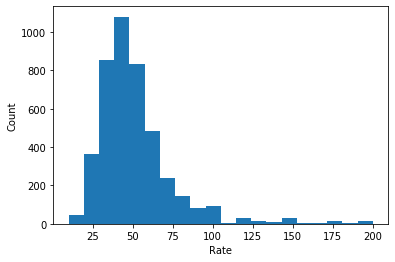

In [7]:
plt.hist(df.rate, bins=20, range=(10,200))
plt.xlabel('Rate')
plt.ylabel('Count')
plt.show()

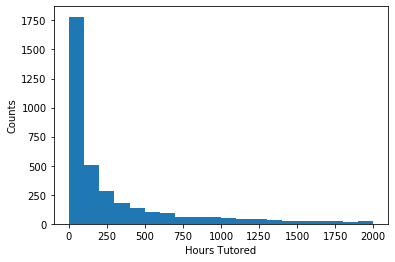

In [9]:
plt.hist(df.hours_tutor, bins=20, range=(0,2000))
plt.xlabel('Hours Tutored')
plt.ylabel('Counts')
plt.show()

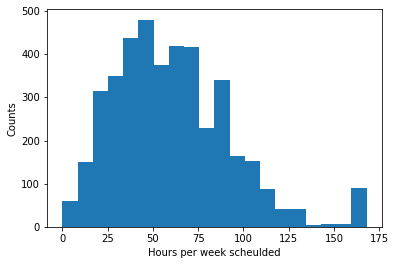

In [11]:
plt.hist(df.hours_per_week_schedule, bins=20)
plt.xlabel('Hours per week scheulded')
plt.ylabel('Counts')
plt.show()

In [12]:
#columns to drop
col_drop = ['num_ratings', 'start_date', 'diff_weeks']
df = df.drop(columns=col_drop)

In [19]:
df.loc[df['hours_tutor'] < 2]

,descriptions,hours_tutor,rate,bio,subjects_emph,subjects_all,edu,hours_sun,hours_mon,hours_tues,hours_wed,hours_thurs,hours_fri,hours_sat,hours_per_week_schedule,hours_per_week_tutor
77,"MD/MBA Grad Student, Native Spanish Speaker an...",1.0,25.0,ATTENTION: With the recent news of schools bei...,[],"['Psychology', 'Biology', 'Anatomy', 'Elementa...","['Kettering College Human Biology', 'Loma Lind...",12.0,13.0,8.0,8.0,12.0,12.0,0.0,65.0,NaN
88,Bilingual High School math tutor,1.0,35.0,I'm Sandy! I graduated with a Bachelors degree...,[],"['Algebra 1', 'Geometry', 'Precalculus', 'Elem...",['Ottawa University Biology'],16.0,3.0,16.0,16.0,16.0,16.0,16.0,99.0,NaN
117,Experienced Tutor in Math and Physics,1.0,45.0,My name is Yasin. I graduated from UCLA with a...,[],"['Algebra 1', 'Geometry', 'Precalculus', 'Alge...","['Alumni of University of California, Los Ange...",12.0,2.0,0.0,0.0,0.0,0.0,8.0,22.0,0.083333
165,Mathematics tutor with over 7 years of experience,1.0,40.0,Hello everyone!My name is Ken. I obtained my b...,['Trigonometry'],"['Algebra 1', 'Geometry', 'Precalculus', 'SAT ...",['California State University Long Beach Mathe...,4.0,7.0,6.0,6.0,6.0,6.0,6.0,41.0,0.111111
179,"10+ yrs teaching, 5+ tutoring; SAT Math, Algeb...",1.0,40.0,It’s my passion to teach and see students succ...,['Geometry'],"['GED', 'Algebra 1', 'SAT Math', 'Elementary M...",['THE UNIVERSITY OF TEXAS AT AUSTIN Mathematic...,1.0,16.0,14.0,14.0,14.0,14.0,10.0,83.0,0.023810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,"Tutor of Math, Probability, and Poker",1.0,50.0,I've mentored/coached approximately two dozen ...,"['Probability', 'Poker']",['Elementary Math'],['Arizona State University Health Coaching'],13.0,13.0,13.0,13.0,13.0,13.0,13.0,91.0,NaN
4190,"Highly skilled math tutor in Algebra, Trig, an...",1.0,45.0,My name is Davi. I'm very outgoing and I have ...,['Algebra 2'],"['Algebra 1', 'Trigonometry', 'Precalculus']",['4 year at Brigham Young University Idaho App...,9.0,11.0,4.0,4.0,5.0,7.0,7.0,47.0,NaN
4283,Math and Science experienced certified teacher,1.0,35.0,"I'm Mike, I graduated with a bachelor's degree...","['Microsoft Access', 'Mechanical Engineering',...","['Astronomy', 'Biology', 'Vocabulary', 'Calcul...","['Seattle University General Science', 'Wester...",10.0,10.0,10.0,10.0,10.0,10.0,10.0,70.0,0.125000
4315,"Medical Graduate Tutoring for USMLE, Biology &...",1.0,60.0,"Hi, I'm Pranathi! I am a recent medical gradua...",['USMLE'],"['Elementary Math', 'Microbiology', 'Biology']","['Kasturba Medical College, Manipal University...",0.0,9.0,14.0,14.0,14.0,14.0,5.0,70.0,NaN
